# Tunning Binary Classifier Models - For CInc

## Importing Libraries

In [2]:
import pandas as pd
rs = 42
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import loguniform as sp_loguniform
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
rs = 42
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score,make_scorer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import mlxtend
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn import metrics
from numpy import arange
#pip install scikit-plot
from sklearn.metrics import confusion_matrix
#import scikitplot as skplt

from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import cross_val_score
from numpy import mean, std
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

# created functions
from evaluation import cross_validation_report,print_confusion_matrix,cross_validation_report_reg,nulls,boxplot_metrics, time_bar_chart,test_validation_bin, multi_algo_auc_plot

In [9]:
#!pip install mlxtend
#!pip install scikitplot

## Importing Data

In [4]:
# importing dataset
dataset_l_tr = pd.read_csv('dfr_tr_l.csv')
dataset_l_ho = pd.read_csv('dfr_ho_l.csv')

In [5]:
dataset_l_tr.drop(['Donates','Volunteers'], axis = 1, inplace = True)
dataset_l_ho.drop(['Donates','Volunteers'], axis = 1, inplace = True)

In [6]:
# split the data into X and Y
y_ltr_c = dataset_l_tr['quant'].copy()
y_ltr_r = dataset_l_tr['CInc'].copy()
X_ltr = dataset_l_tr.drop(['CInc','quant'],axis=1).copy()

y_lho_c = dataset_l_ho['quant'].copy()
y_lho_r = dataset_l_ho['CInc'].copy()
X_lho = dataset_l_ho.drop(['CInc','quant'],axis=1).copy()


In [7]:
cv = StratifiedKFold(n_splits=10, random_state=rs, shuffle = True)

## Models

### Random Forest Tunning

In [8]:
est = RandomForestClassifier(n_jobs = -1, random_state = rs)
rfe = RFE(est, n_features_to_select=  20)
rfe.fit(X_ltr, y_ltr_c)
selected_feat_rf = []
for i in range(X_ltr.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_ltr.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True: 
        selected_feat_rf.append(X_ltr.columns[i])
selected_feat_rf

Column: Bachelor_GPA, Selected True, Rank: 1.000
Column: Bachelor_Honors, Selected False, Rank: 26.000
Column: Age, Selected True, Rank: 1.000
Column: Gender, Selected True, Rank: 1.000
Column: Scholarship_Percent, Selected True, Rank: 1.000
Column: First_Comp_Size, Selected True, Rank: 1.000
Column: Curr_Comp_Size, Selected True, Rank: 1.000
Column: Country_First_Job, Selected False, Rank: 27.000
Column: Years_Worked_Foreign, Selected True, Rank: 1.000
Column: Senior_Position, Selected False, Rank: 9.000
Column: People_in_Charge, Selected True, Rank: 1.000
Column: Negotiation_Imp, Selected True, Rank: 1.000
Column: TeamWork_Imp, Selected True, Rank: 1.000
Column: Innovation_Imp, Selected True, Rank: 1.000
Column: Communication_Imp, Selected False, Rank: 3.000
Column: Planning_Imp, Selected True, Rank: 1.000
Column: No_Created_Ventures, Selected True, Rank: 1.000
Column: Used_Incubator_program, Selected False, Rank: 52.000
Column: Board_Member, Selected False, Rank: 24.000
Column: NonP

['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'TeamWork_Imp',
 'Innovation_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'CurrE_Manager',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [9]:
selected_feat_rf

['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'TeamWork_Imp',
 'Innovation_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'CurrE_Manager',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [10]:
selected_feat_rf =['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'TeamWork_Imp',
 'Innovation_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'CurrE_Manager',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [11]:
rf_grid_search= GridSearchCV(estimator = est, param_grid={'n_estimators': [10, 100, 500,1000], 'min_samples_leaf': [2,4,6,8],'min_samples_split' : [2, 5, 10] }, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
rf_grid_win = rf_grid_search.fit(X_ltr[selected_feat_rf], y_ltr_c)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [12]:
# Get the estimator
best_clf_rf = rf_grid_win.best_estimator_
best_clf_rf
#results in data frame
rf_results = pd.DataFrame(rf_grid_win.cv_results_)
# show the first 5 rows
display(rf_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.173944,0.034127,0.028823,0.006375,2,2,10,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.812627,0.798371,...,0.787169,0.822811,0.804481,0.825866,0.804481,0.795316,0.795316,0.803768,0.012389,47
1,1.065581,0.269692,0.439263,0.217437,2,2,100,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.828921,0.811609,...,0.802444,0.844196,0.807536,0.822811,0.821792,0.813646,0.824847,0.819145,0.011433,33
2,5.099410,2.006195,1.737334,0.876075,2,2,500,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.827902,0.811609,...,0.803462,0.840122,0.803462,0.822811,0.828921,0.816701,0.822811,0.819348,0.010979,30
3,13.675391,3.286616,3.122480,1.769331,2,2,1000,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.826884,0.810591,...,0.804481,0.838086,0.806517,0.824847,0.829939,0.819756,0.828921,0.820570,0.010502,2
4,0.832785,0.353815,0.201967,0.147708,2,5,10,"{'min_samples_leaf': 2, 'min_samples_split': 5...",0.810591,0.792261,...,0.771894,0.813646,0.792261,0.799389,0.808554,0.801426,0.812627,0.799796,0.012102,48


In [13]:
# Report the before-and-afterscores
print ("\nUnoptimized model:\n------")
# evaluate model
n_scores = cross_val_score(est,X_ltr[selected_feat_rf], y_ltr_c,scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Unoptimized model:
------
Accuracy score: 0.815 (0.010)


In [14]:
rf_scores = np.array(rf_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (rf_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (rf_grid_win.best_score_)

Best gridsearch parameters
------
{'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
----------
Best score
------
0.8211812627291242


In [51]:
rf_bin = RandomForestClassifier(random_state = rs, min_samples_leaf=2, min_samples_split= 10 , n_estimators = 500)

### Lasso Logistic Regression

In [27]:
# Create cross-validated logistic regression
clf = LogisticRegressionCV(random_state=rs, penalty = 'l1', solver = 'liblinear',  verbose = 2, n_jobs=-1 , Cs=np.linspace(0.001, 0.06, 100), cv = cv)
# Train model
clf_grid_win= clf.fit(X_ltr, y_ltr_c)
clf_grid_win.C_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.3min remaining:   32.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished


[LibLinear]

array([0.04867677])

Text(0, 0.5, 'Mean CV-accuracy')

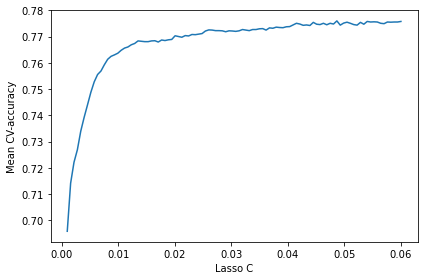

In [29]:
c_values = np.linspace(0.001, 0.06, 100)
plt.plot(c_values, np.mean(clf_grid_win.scores_[1], axis=0))
plt.xlabel('Lasso C')
plt.ylabel('Mean CV-accuracy')

In [30]:
model_pipe = Pipeline([('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state = rs, penalty = 'l1', n_jobs = -1, solver = 'liblinear'))
])
params={'model__C':  np.linspace(0.001, 0.06, 100)}
lr_grid_search = GridSearchCV(model_pipe, param_grid= params,scoring='accuracy', cv=cv, n_jobs=-1)
lr_grid_win = lr_grid_search.fit(X_ltr, y_ltr_c)
print('Accuracy: %.3f' % lr_grid_win.best_score_)
print('Config: %s' % lr_grid_win.best_params_)

Accuracy: 0.780
Config: {'model__C': 0.05880808080808081}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [31]:
# Get the estimator
best_clf_lr = lr_grid_win.best_estimator_
best_clf_lr
#results in data frame
lr_results = pd.DataFrame(lr_grid_win.cv_results_)
# show the first 5 rows
display(lr_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.151331,0.007205,0.005649,0.000413,0.001,{'model__C': 0.001},0.751748,0.741958,0.732867,0.750350,0.742657,0.728671,0.730070,0.706993,0.714685,0.734080,0.733408,0.013655,100
1,0.151583,0.006611,0.005856,0.000916,0.00159596,{'model__C': 0.001595959595959596},0.759441,0.758042,0.751049,0.765035,0.762937,0.744755,0.754545,0.730070,0.734266,0.745276,0.750542,0.011228,99
2,0.153616,0.003721,0.005510,0.000441,0.00219192,{'model__C': 0.002191919191919192},0.771329,0.769930,0.767832,0.765035,0.774825,0.755245,0.764336,0.746853,0.739860,0.749475,0.760472,0.011233,98
3,0.155006,0.004129,0.005473,0.000344,0.00278788,{'model__C': 0.002787878787878788},0.774126,0.771329,0.776923,0.769231,0.772727,0.758741,0.771329,0.757343,0.746853,0.752274,0.765088,0.009860,97
4,0.159016,0.004941,0.005504,0.000291,0.00338384,{'model__C': 0.003383838383838384},0.779720,0.775524,0.782517,0.767133,0.770629,0.762238,0.772727,0.756643,0.748951,0.754374,0.767046,0.010660,96


In [32]:
lr_scores = np.array(lr_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (lr_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (lr_grid_win.best_score_)

Best gridsearch parameters
------
{'model__C': 0.05880808080808081}
----------
Best score
------
0.7795646620699106


In [16]:
lr = LogisticRegression(random_state=rs, penalty = 'l1', verbose = 2, n_jobs = -1, C = 0.058, solver = 'saga')
#sel_ = SelectFromModel(lr, max_features = 20)
#sel_.fit(X_ltr, y_ltr_c)
#selected_feat_lr = X_ltr.columns[(sel_.get_support())]
#selected_feat_lr
#sel_ =  RFE(lr, n_features_to_select=  20)
#sel_.fit(X_ltr, y_ltr_c)
#selected_feat_lr = X_ltr.columns[(sel_.get_support())]
#selected_feat_lr

In [17]:
sfs_LR = SFS(lr, 
          k_features=20, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1,
           verbose = 2)

In [18]:
sbs = sfs_LR.fit(X_ltr, y_ltr_c)
print('\nSequential Forward Floating Selection (k=20):')
print(sfs_LR.k_feature_idx_)
print('CV Score:')
print(sfs_LR.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  71 | elapsed:    1.5s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  48 out of  71 | elapsed:   19.7s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:   21.4s finished

[2021-02-06 16:16:47] Features: 1/20 -- score: 0.6629327902240326[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  70 | elapsed:    1.2s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  47 out of  70 | elapsed:    1.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished

[2021-02-06 16:16:51] Features: 2/20 -- score: 0.704786150712831[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: D

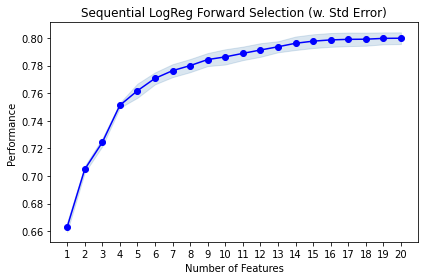

In [19]:
plot_sfs(sfs_LR.get_metric_dict(), kind='std_err');
plt.title('Sequential LogReg Forward Selection (w. Std Error)')
plt.show()

In [20]:
selected_feat_lr = X_ltr.columns[[sbs.k_feature_idx_]]
selected_feat_lr

Index(['Bachelor_Honors', 'Age', 'Gender', 'Curr_Comp_Size',
       'Years_Worked_Foreign', 'Senior_Position', 'People_in_Charge',
       'No_Created_Ventures', 'Book', 'School_Other', 'Campus_Virtual',
       'Curr_Loc_Foreign', 'Curr_Loc_North', 'Curr_Loc_Other', 'FO_Employee',
       'MO_Public Server', 'FirstE_Analyst or Assistant', 'CurrE_Employee',
       'CurrE_Senior Manager', 'CInd_Tertiary'],
      dtype='object')

In [22]:
selected_feat_lr = ['Bachelor_Honors', 'Age', 'Gender', 'Curr_Comp_Size',
       'Years_Worked_Foreign', 'Senior_Position', 'People_in_Charge',
       'No_Created_Ventures', 'Book', 'School_Other', 'Campus_Virtual',
       'Curr_Loc_Foreign', 'Curr_Loc_North', 'Curr_Loc_Other', 'FO_Employee',
       'MO_Public Server', 'FirstE_Analyst or Assistant', 'CurrE_Employee',
       'CurrE_Senior Manager', 'CInd_Tertiary']

In [52]:

lr_bin = LogisticRegression(random_state=rs, penalty = 'l1', verbose = 2, n_jobs = -1, C = 0.058, solver = 'saga')

## Decision Tree

In [24]:
est = DecisionTreeClassifier(random_state = rs)
rfe = RFE(est, n_features_to_select=  20)
rfe.fit(X_ltr, y_ltr_c)
selected_feat_dt  = []
for i in range(X_ltr.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_ltr.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True: 
        selected_feat_dt .append(X_ltr.columns[i])   

Column: Bachelor_GPA, Selected True, Rank: 1.000
Column: Bachelor_Honors, Selected False, Rank: 20.000
Column: Age, Selected True, Rank: 1.000
Column: Gender, Selected True, Rank: 1.000
Column: Scholarship_Percent, Selected True, Rank: 1.000
Column: First_Comp_Size, Selected True, Rank: 1.000
Column: Curr_Comp_Size, Selected True, Rank: 1.000
Column: Country_First_Job, Selected False, Rank: 11.000
Column: Years_Worked_Foreign, Selected True, Rank: 1.000
Column: Senior_Position, Selected False, Rank: 37.000
Column: People_in_Charge, Selected True, Rank: 1.000
Column: Negotiation_Imp, Selected True, Rank: 1.000
Column: TeamWork_Imp, Selected False, Rank: 5.000
Column: Innovation_Imp, Selected True, Rank: 1.000
Column: Communication_Imp, Selected True, Rank: 1.000
Column: Planning_Imp, Selected True, Rank: 1.000
Column: No_Created_Ventures, Selected True, Rank: 1.000
Column: Used_Incubator_program, Selected False, Rank: 51.000
Column: Board_Member, Selected False, Rank: 35.000
Column: Non

In [26]:
selected_feat_dt

['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'Innovation_Imp',
 'Communication_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'CurrE_Manager',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [27]:
selected_feat_dt =['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'Innovation_Imp',
 'Communication_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'CurrE_Manager',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [28]:
dt_grid_search= GridSearchCV(estimator = est, param_grid={'max_depth' : [2,4,6,8]}, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
dt_grid_win = dt_grid_search.fit(X_ltr[selected_feat_dt], y_ltr_c)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [29]:
print('Mean Accuracy: %.3f' % dt_grid_win.best_score_)
print('Config: %s' % dt_grid_win.best_params_)

Mean Accuracy: 0.795
Config: {'max_depth': 8}


In [53]:
dt_bin = DecisionTreeClassifier( max_depth = 8)

### LDA Tuning

In [31]:
lda = LinearDiscriminantAnalysis()

In [32]:
sfs_lda = SFS(lda, 
          k_features=20, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1,
           verbose = 2)


In [33]:
sfs = sfs_lda.fit(X_ltr, y_ltr_c)
print('\nSequential Forward Floating Selection (k=20):')
print(sfs_lda.k_feature_idx_)
print('CV Score:')
print(sfs_lda.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  71 | elapsed:    0.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  48 out of  71 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:   13.9s finished

[2021-02-06 16:31:08] Features: 1/20 -- score: 0.6629327902240326[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  70 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  47 out of  70 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-02-06 16:31:08] Features: 2/20 -- score: 0.704786150712831[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: D

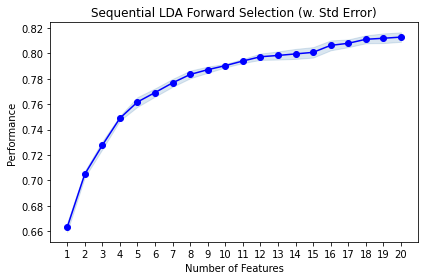

In [34]:
plot_sfs(sfs_lda.get_metric_dict(), kind='std_err');
plt.title('Sequential LDA Forward Selection (w. Std Error)')
plt.show()

In [35]:
sfs_lda2 = SFS(lda, 
          k_features=30, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1,
           verbose = 2)
sfs = sfs_lda2.fit(X_ltr, y_ltr_c)
print('\nSequential Forward Floating Selection (k=20):')
print(sfs_lda2.k_feature_idx_)
print('CV Score:')
print(sfs_lda2.k_score_)

   4 out of   4 | elapsed:    0.0s finished

[2021-02-06 16:31:52] Features: 5/30 -- score: 0.7617107942973524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  66 | elapsed:    0.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  39 out of  66 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-02-06 16:31:52] Features: 6/30 -- score: 0.7691446028513239[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  65 | elapsed:    0.2s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  36 out of  65 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | e

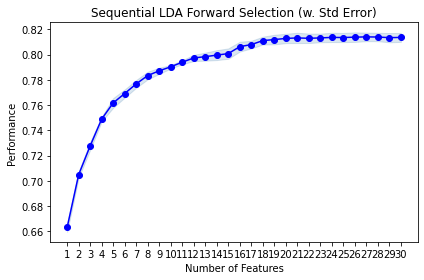

In [36]:
plot_sfs(sfs_lda2.get_metric_dict(), kind='std_err');
plt.title('Sequential LDA Forward Selection (w. Std Error)')
plt.show()

In [40]:
selected_feat_lda = X_ltr.columns[[sfs_lda.k_feature_idx_]]
selected_feat_lda

Index(['Bachelor_Honors', 'Age', 'Gender', 'Scholarship_Percent',
       'First_Comp_Size', 'Curr_Comp_Size', 'Years_Worked_Foreign',
       'Senior_Position', 'People_in_Charge', 'No_Created_Ventures', 'Book',
       'Nationality_For', 'School_Other', 'Campus_CDMX', 'Campus_Virtual',
       'Curr_Loc_Foreign', 'CurrE_Manager', 'CurrE_Owner_Freelancer',
       'CurrE_Senior Manager', 'CInd_Tertiary'],
      dtype='object')

In [41]:
selected_feat_lda =['Bachelor_Honors', 'Age', 'Gender', 'Scholarship_Percent',
       'First_Comp_Size', 'Curr_Comp_Size', 'Years_Worked_Foreign',
       'Senior_Position', 'People_in_Charge', 'No_Created_Ventures', 'Book',
       'Nationality_For', 'School_Other', 'Campus_CDMX', 'Campus_Virtual',
       'Curr_Loc_Foreign', 'CurrE_Manager', 'CurrE_Owner_Freelancer',
       'CurrE_Senior Manager', 'CInd_Tertiary']

In [42]:
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_ltr[selected_feat_lda], y_ltr_c)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.810
Config: {'solver': 'svd'}


In [43]:
lda_bin = LinearDiscriminantAnalysis(solver =  'svd')

## NB

In [44]:
mnb = MultinomialNB()

In [45]:
sfs_nb = SFS(mnb, 
          k_features=20, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1,
           verbose = 2)
sfs_nb = sfs_nb.fit(X_ltr, y_ltr_c)
print('\nSequential NB Forward Floating Selection (k=20):')
print(sfs_nb.k_feature_idx_)
print('CV Score:')
print(sfs_nb.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  71 | elapsed:    0.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  48 out of  71 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:   12.7s finished

[2021-02-06 16:43:48] Features: 1/20 -- score: 0.5358452138492872[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  70 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  47 out of  70 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-02-06 16:43:48] Features: 2/20 -- score: 0.6629327902240326[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: 

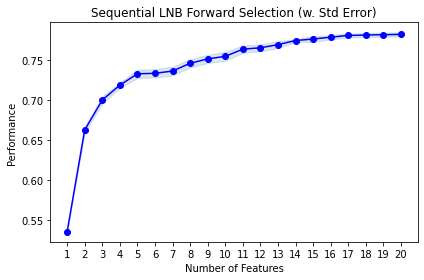

In [46]:
plot_sfs(sfs_nb.get_metric_dict(), kind='std_err');
plt.title('Sequential LNB Forward Selection (w. Std Error)')
plt.show()

In [47]:
selected_feat_nb = X_ltr.columns[[sfs_nb.k_feature_idx_]]
selected_feat_nb

Index(['Bachelor_GPA', 'Bachelor_Honors', 'Gender', 'First_Comp_Size',
       'Curr_Comp_Size', 'Years_Worked_Foreign', 'People_in_Charge',
       'Negotiation_Imp', 'Innovation_Imp', 'No_Created_Ventures',
       'Used_Incubator_program', 'School_Other', 'Campus_MTY',
       'Campus_Virtual', 'Curr_Loc_Foreign', 'FInd_Secondary',
       'CurrE_Employee', 'CurrE_Manager', 'CurrE_Owner_Freelancer',
       'CurrE_Senior Manager'],
      dtype='object')

In [48]:
selected_feat_nb = ['Bachelor_GPA', 'Bachelor_Honors', 'Gender', 'First_Comp_Size',
       'Curr_Comp_Size', 'Years_Worked_Foreign', 'People_in_Charge',
       'Negotiation_Imp', 'Innovation_Imp', 'No_Created_Ventures',
       'Used_Incubator_program', 'School_Other', 'Campus_MTY',
       'Campus_Virtual', 'Curr_Loc_Foreign', 'FInd_Secondary',
       'CurrE_Employee', 'CurrE_Manager', 'CurrE_Owner_Freelancer',
       'CurrE_Senior Manager']

In [49]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

nb_grid = GridSearchCV(mnb, param_grid=params, n_jobs=-1, cv=cv, verbose=5)
results = nb_grid.fit(X_ltr[selected_feat_nb], y_ltr_c)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Mean Accuracy: 0.780
Config: {'alpha': 0.01}


In [54]:
nb_bin = MultinomialNB(alpha = 0.01)

## KNN Tunning

In [55]:
knn_clf = KNeighborsClassifier(n_jobs = -1)
sfs_knn = SFS(knn_clf, 
          k_features=20, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1)
sfs_knn = sfs_knn.fit(X_ltr, y_ltr_c)
print('\nSequential NB Forward Floating Selection (k=20):')
print(sfs_knn.k_feature_idx_)
print('CV Score:')
print(sfs_knn.k_score_)


Sequential NB Forward Floating Selection (k=20):
(2, 3, 6, 8, 10, 20, 23, 30, 31, 34, 38, 45, 54, 59, 61, 62, 63, 64, 66, 68)
CV Score:
0.7912423625254583


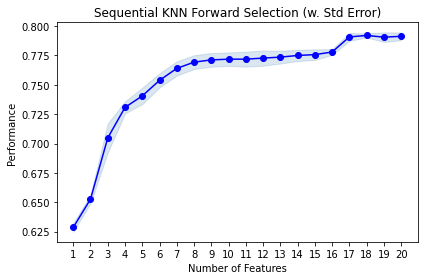

In [56]:
plot_sfs(sfs_knn.get_metric_dict(), kind='std_err');
plt.title('Sequential KNN Forward Selection (w. Std Error)')
plt.show()

In [57]:
selected_feat_knn = X_ltr.columns[[sfs_knn.k_feature_idx_]]
selected_feat_knn

Index(['Age', 'Gender', 'Curr_Comp_Size', 'Years_Worked_Foreign',
       'People_in_Charge', 'Book', 'Business_partner', 'School_Other',
       'Campus_CDMX', 'Campus_North', 'Curr_Loc_Foreign', 'FO_Other',
       'FirstE_Manager_Owner', 'FInd_Secondary', 'CurrE_Employee',
       'CurrE_Manager', 'CurrE_Owner_Freelancer', 'CurrE_Senior Manager',
       'CInd_Quaternary', 'CInd_Tertiary'],
      dtype='object')

In [58]:
selected_feat_knn = ['Age', 'Gender', 'Curr_Comp_Size', 'Years_Worked_Foreign',
       'People_in_Charge', 'Book', 'Business_partner', 'School_Other',
       'Campus_CDMX', 'Campus_North', 'Curr_Loc_Foreign', 'FO_Other',
       'FirstE_Manager_Owner', 'FInd_Secondary', 'CurrE_Employee',
       'CurrE_Manager', 'CurrE_Owner_Freelancer', 'CurrE_Senior Manager',
       'CInd_Quaternary', 'CInd_Tertiary']

In [59]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,20))
n_neighbors = list(range(1,20))
p=[1,2] # When p= 1 it is the manhattan and when it is 2 is the euclidean
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
search= GridSearchCV(knn_clf, hyperparameters, cv=cv, n_jobs = -1)

In [60]:
knn_grid_win = search.fit(X_ltr[selected_feat_knn], y_ltr_c)

In [61]:
# Get the estimator
best_clf_knn = knn_grid_win.best_estimator_
best_clf_knn
#results in data frame
knn_results = pd.DataFrame(knn_grid_win.cv_results_)
# show the first 5 rows
display(knn_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015414,0.002061,1.003826,0.205055,1,1,1,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}",0.762729,0.743381,...,0.744399,0.752546,0.743381,0.732179,0.732179,0.751527,0.740326,0.743381,0.009671,647
1,0.017214,0.001835,1.477819,0.244187,1,1,2,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}",0.767821,0.739308,...,0.743381,0.747454,0.741344,0.734216,0.736253,0.752546,0.738289,0.743381,0.009915,647
2,0.019116,0.009145,1.295268,0.209778,1,2,1,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1}",0.744399,0.736253,...,0.750509,0.746436,0.736253,0.750509,0.726069,0.741344,0.738289,0.739715,0.008213,685
3,0.014112,0.001515,1.159456,0.125531,1,2,2,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2}",0.747454,0.732179,...,0.745418,0.742363,0.734216,0.748473,0.725051,0.738289,0.732179,0.737576,0.007635,704
4,0.026322,0.037276,1.108214,0.146605,1,3,1,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}",0.782077,0.759674,...,0.779022,0.783096,0.760692,0.783096,0.768839,0.787169,0.769857,0.775051,0.009238,571


In [62]:
# summarize
print('Mean Accuracy: %.3f' % knn_grid_win.best_score_)
print('Config: %s' % knn_grid_win.best_params_)

Mean Accuracy: 0.803
Config: {'leaf_size': 1, 'n_neighbors': 19, 'p': 1}


In [63]:
knn_bin = KNeighborsClassifier(n_jobs = -1, leaf_size = 7, n_neighbors = 19, p = 1) 

### Light Gradient Boosting Tunning

In [29]:
# Load the object
#import pickle
#with open('tuned_models/binary_lgb_model_win.data','rb') as data:
    #lgb_grid_win= pickle.load(data)
#with open('tuned_models/binary_lgb_model_grid.data','rb') as data:
    #lgb_grid_search= pickle.load(data)

In [64]:
est = LGBMClassifier(random_state = rs)
rfe = RFE(est, n_features_to_select=  20)
rfe.fit(X_ltr, y_ltr_c)
selected_feat_lgb  = []
for i in range(X_ltr.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_ltr.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True: 
        selected_feat_lgb .append(X_ltr.columns[i])   

Column: Bachelor_GPA, Selected True, Rank: 1.000
Column: Bachelor_Honors, Selected False, Rank: 2.000
Column: Age, Selected True, Rank: 1.000
Column: Gender, Selected True, Rank: 1.000
Column: Scholarship_Percent, Selected True, Rank: 1.000
Column: First_Comp_Size, Selected True, Rank: 1.000
Column: Curr_Comp_Size, Selected True, Rank: 1.000
Column: Country_First_Job, Selected False, Rank: 24.000
Column: Years_Worked_Foreign, Selected True, Rank: 1.000
Column: Senior_Position, Selected False, Rank: 20.000
Column: People_in_Charge, Selected True, Rank: 1.000
Column: Negotiation_Imp, Selected True, Rank: 1.000
Column: TeamWork_Imp, Selected False, Rank: 18.000
Column: Innovation_Imp, Selected False, Rank: 5.000
Column: Communication_Imp, Selected False, Rank: 11.000
Column: Planning_Imp, Selected False, Rank: 4.000
Column: No_Created_Ventures, Selected True, Rank: 1.000
Column: Used_Incubator_program, Selected False, Rank: 52.000
Column: Board_Member, Selected False, Rank: 42.000
Column:

In [65]:
selected_feat_lgb

['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'No_Created_Ventures',
 'Campus_MTY',
 'Campus_Virtual',
 'Curr_Loc_Foreign',
 'CurrE_Manager',
 'CurrE_Owner_Freelancer',
 'CurrE_Senior Manager',
 'CInd_Quaternary',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [15]:
selected_feat_lgb = ['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Curr_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'No_Created_Ventures',
 'Campus_MTY',
 'Campus_Virtual',
 'Curr_Loc_Foreign',
 'CurrE_Manager',
 'CurrE_Owner_Freelancer',
 'CurrE_Senior Manager',
 'CInd_Quaternary',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [66]:
pipe_lgb = Pipeline(steps=[('s',rfe),('m',est)])
# evaluate model
n_scores = cross_val_score(pipe_lgb, X_ltr, y_ltr_c, scoring='accuracy', cv=2, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.813 (0.003)


In [68]:
lgb_grid_search= GridSearchCV(estimator = est, param_grid={'max_depth': [2,4,6,8], 'n_estimators': [10, 100, 500], 'num_leaves': [4,16,32,64] , 'learning_rate':list(np.logspace(np.log(0.005), np.log(0.2),base = np.exp(1), num= 10)) }, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
lgb_grid_win = lgb_grid_search.fit(X_ltr[selected_feat_lgb], y_ltr_c)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


In [69]:
# Get the estimator
best_clf_lgb = lgb_grid_win.best_estimator_
best_clf_lgb
#results in data frame
lgb_results = pd.DataFrame(lgb_grid_win.cv_results_)
# show the first 5 rows
display(lgb_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_num_leaves,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.092776,0.011824,0.008212,0.001077,0.005,2,10,4,"{'learning_rate': 0.005000000000000004, 'max_d...",0.536660,...,0.535642,0.535642,0.535642,0.535642,0.535642,0.535642,0.535642,0.535845,0.000407,448
1,0.088673,0.016879,0.008406,0.001201,0.005,2,10,16,"{'learning_rate': 0.005000000000000004, 'max_d...",0.536660,...,0.535642,0.535642,0.535642,0.535642,0.535642,0.535642,0.535642,0.535845,0.000407,448
2,0.087072,0.010078,0.008307,0.001793,0.005,2,10,32,"{'learning_rate': 0.005000000000000004, 'max_d...",0.536660,...,0.535642,0.535642,0.535642,0.535642,0.535642,0.535642,0.535642,0.535845,0.000407,448
3,0.082768,0.006138,0.008007,0.000895,0.005,2,10,64,"{'learning_rate': 0.005000000000000004, 'max_d...",0.536660,...,0.535642,0.535642,0.535642,0.535642,0.535642,0.535642,0.535642,0.535845,0.000407,448
4,0.239598,0.029456,0.013210,0.001940,0.005,2,100,4,"{'learning_rate': 0.005000000000000004, 'max_d...",0.767821,...,0.757637,0.773931,0.735234,0.753564,0.792261,0.759674,0.758656,0.760489,0.014472,398


In [70]:
lgb_scores = np.array(lgb_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (lgb_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (lgb_grid_win.best_score_)

Best gridsearch parameters
------
{'learning_rate': 0.02576301385940817, 'max_depth': 8, 'n_estimators': 500, 'num_leaves': 32}
----------
Best score
------
0.8307535641547862


In [73]:
lgbm_bin = LGBMClassifier(random_state = rs,  max_depth = 8, n_estimators =  500, num_leaves = 32, learning_rate = 0.0257)

In [75]:
# Save the object in a python file
import pickle
with open('binary_lgb_model_win.data','wb') as data:
    pickle.dump(lgb_grid_win, data)
#with open('tuned_models/binary_lgb_model_grid.data','wb') as data:
    #pickle.dump(lgb_grid_search, data)

## Evaluation

In [76]:
classifiers = {}
auc_results = {}
f1_results = {}
acc_results = {}
kappa_results = {}
clf_time = {}
classifiers['acc'] = acc_results
classifiers['f1'] = f1_results
classifiers['auc'] = auc_results
classifiers['kappa'] = kappa_results
classifiers['time'] = clf_time

In [77]:
from sklearn.dummy import DummyClassifier, DummyRegressor

In [78]:



dummy = DummyClassifier(random_state= rs, strategy = 'uniform') # generates prediction uniformly at random

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 19 epochs took 0 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 18 epochs took 0 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 17 epochs took 0 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 19 epochs took 0 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 18 epochs took 0 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)

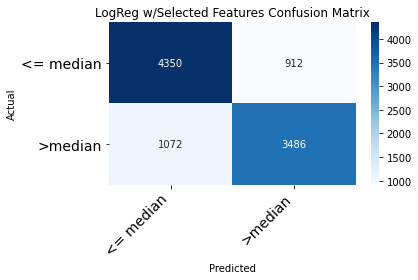

In [79]:
name = 'LogReg w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr[selected_feat_lr ],y_ltr_c,lr_bin,cnames = ['<= median', '>median'],model_name = name,scale = True)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 18 epochs took 1 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 18 epochs took 1 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 18 epochs took 0 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 18 epochs took 1 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 18 epochs took 1 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)

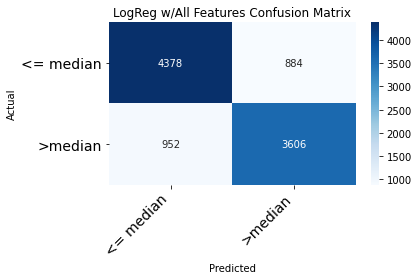

In [80]:
name = 'LogReg w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr,y_ltr_c,lr_bin,cnames = ['<= median', '>median'],model_name = name,scale = True)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: RF w/Selected Features
 AUC : 0.89900834616504
 F1 weighted : 0.8206081004521157
 Accuracy : 0.8205702647657842
 Kappa Statitic : 0.6391042635447268
Process Complete in : 89.57188177108765 sec.


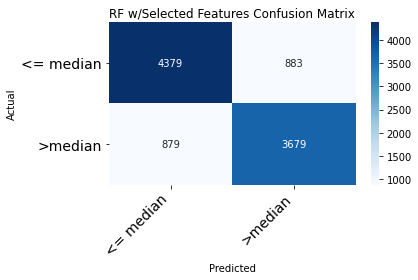

In [81]:
name = 'RF w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr[selected_feat_rf  ],y_ltr_c,rf_bin,cnames = ['<= median', '>median'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: RF w/All Features
 AUC : 0.9064118354689226
 F1 weighted : 0.8258494066112385
 Accuracy : 0.825865580448065
 Kappa Statitic : 0.6495257016252289
Process Complete in : 112.46773505210876 sec.


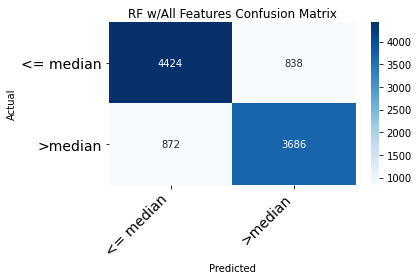

In [82]:
name = 'RF w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr,y_ltr_c,rf_bin,cnames = ['<= median', '>median'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: LGBM w/Selected Features
 AUC : 0.9082566329277382
 F1 weighted : 0.8301077703140223
 Accuracy : 0.8301425661914461
 Kappa Statitic : 0.6580960798539257
Process Complete in : 260.3746871948242 sec.


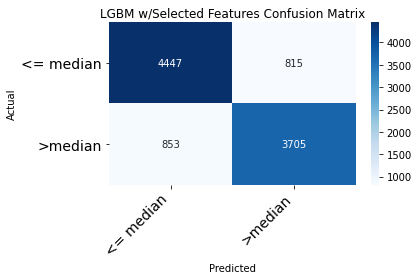

In [83]:
name = 'LGBM w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr[selected_feat_lgb],y_ltr_c,lgbm_bin,cnames = ['<= median', '>median'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: LGBM w/All Features
 AUC : 0.9110542408506028
 F1 weighted : 0.8302438917790065
 Accuracy : 0.8302443991853361
 Kappa Statitic : 0.6584193145342386
Process Complete in : 256.5214819908142 sec.


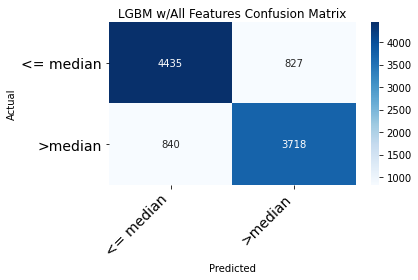

In [84]:
name = 'LGBM w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr,y_ltr_c,lgbm_bin,cnames = ['<= median', '>median'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: Dummy Classifier
 AUC : 0.5
 F1 weighted : 0.4991528155241614
 Accuracy : 0.49837067209775965
 Kappa Statitic : -0.0025214963707927084
Process Complete in : 0.23119163513183594 sec.


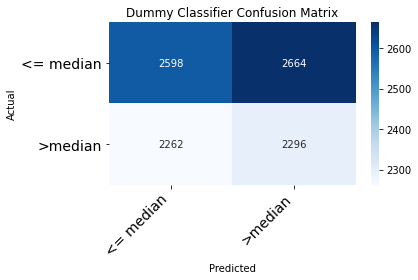

In [85]:
name = 'Dummy Classifier'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr,y_ltr_c,dummy,cnames = ['<= median', '>median'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

## Hold Out Validation

In [86]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, cohen_kappa_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.preprocessing import StandardScaler

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 18 epochs took 1 seconds
max_iter reached after 1 seconds
Accuracy score : 0.7853360488798371
AUC score: 0.8654038279700471
F1 score: 0.7605633802816902
Kappa score: 0.5661489657438814
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


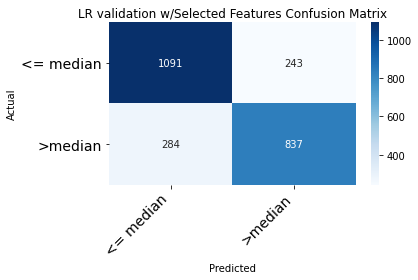

In [87]:
predictions,proba = test_validation_bin(lr_bin, X_ltr, y_ltr_c, X_lho,selected_feat_lr, True)
model_name = 'LR validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_lr_sel = predictions.copy()
proba_lr_sel = proba.copy()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
convergence after 18 epochs took 0 seconds
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
max_iter reached after 4 seconds
Accuracy score : 0.6382892057026477
AUC score: 0.6989161529850596
F1 score: 0.6517647058823529
Kappa score: 0.2867369534149623
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.1s finished


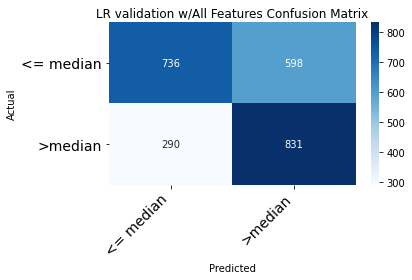

In [88]:
predictions,proba = test_validation_bin(lr_bin, X_ltr, y_ltr_c, X_lho,False, True)
model_name = 'LR validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_lr_all = predictions.copy()
proba_lr_all = proba.copy()

Accuracy score : 0.8016293279022403
AUC score: 0.8901086923086181
F1 score: 0.779936737460461
Kappa score: 0.5994221769982487


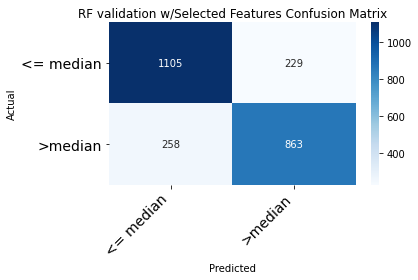

In [89]:
predictions,proba = test_validation_bin(rf_bin, X_ltr, y_ltr_c, X_lho,selected_feat_rf)
model_name = 'RF validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_rf_sel = predictions.copy()
proba_rf_sel = proba.copy()

Accuracy score : 0.8134419551934827
AUC score: 0.8994385501272557
F1 score: 0.7908675799086758
Kappa score: 0.622656516381229


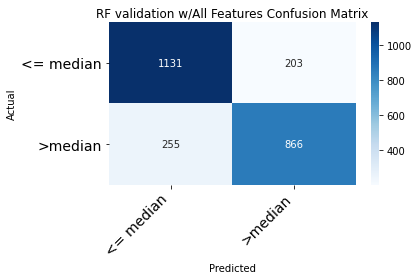

In [90]:
predictions,proba = test_validation_bin(rf_bin, X_ltr, y_ltr_c, X_lho,False)
model_name = 'RF validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_rf_all = predictions.copy()
proba_rf_all = proba.copy()

Accuracy score : 0.8122199592668025
AUC score: 0.8965423621819777
F1 score: 0.7935512763098971
Kappa score: 0.6213487119556254


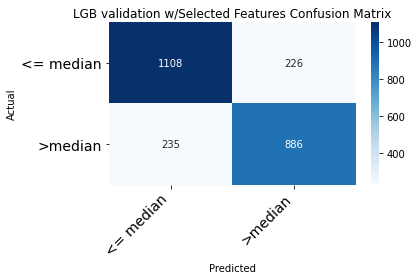

In [91]:
predictions,proba = test_validation_bin(lgbm_bin,  X_ltr, y_ltr_c, X_lho, selected = selected_feat_lgb)
model_name = 'LGB validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_lgbm_sel = predictions.copy()
proba_lgbm_sel = proba.copy()

Accuracy score : 0.8122199592668025
AUC score: 0.9023761981631843
F1 score: 0.7935512763098971
Kappa score: 0.6213487119556254


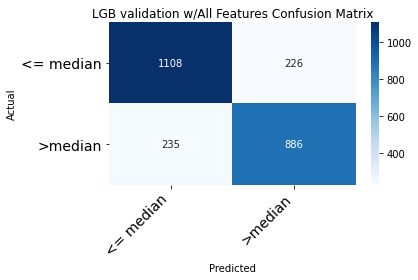

In [92]:
ppredictions,proba = test_validation_bin(lgbm_bin,  X_ltr, y_ltr_c, X_lho, selected = False)
model_name = 'LGB validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_lgbm_all = predictions.copy()
proba_lgbm_all = proba.copy()

Accuracy score : 0.49979633401221996
AUC score: 0.5
F1 score: 0.47114556416882
Kappa score: -0.0022846747264175793


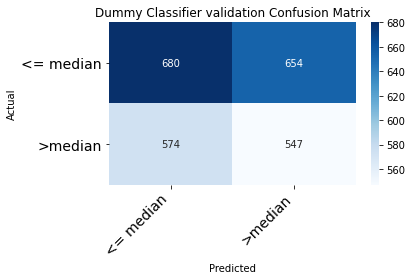

In [93]:
predictions,proba = test_validation_bin(dummy,X_ltr, y_ltr_c, X_lho, selected = False)
model_name = 'Dummy Classifier validation'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_dummy = predictions.copy()
proba_dummy = proba.copy()

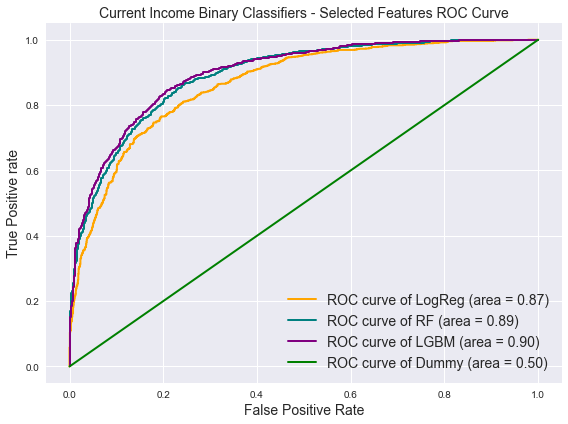

In [94]:
proba_sel_dic = {}
proba_sel_dic['LogReg'] = proba_lr_sel
proba_sel_dic['RF'] = proba_rf_sel
proba_sel_dic['LGBM'] = proba_lgbm_sel
proba_sel_dic['Dummy'] = proba_dummy
multi_algo_auc_plot(proba_sel_dic, y_lho_c, y_lho_c,  title = 'Current Income Binary Classifiers - Selected Features ROC Curve')

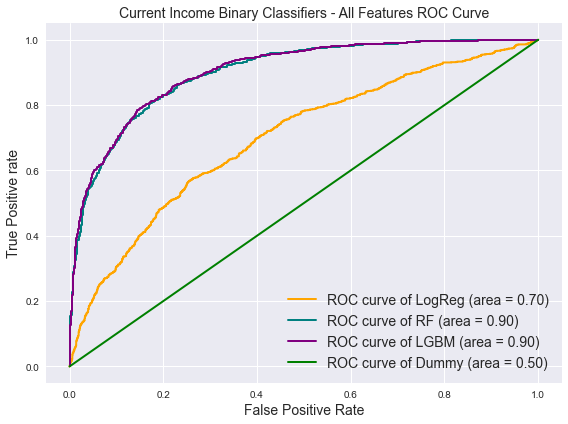

In [95]:
proba_sel_dic = {}
proba_sel_dic['LogReg'] = proba_lr_all
proba_sel_dic['RF'] = proba_rf_all
proba_sel_dic['LGBM'] = proba_lgbm_all
proba_sel_dic['Dummy'] = proba_dummy
multi_algo_auc_plot(proba_sel_dic, y_lho_c, y_lho_c,  title = 'Current Income Binary Classifiers - All Features ROC Curve')

## Export Results

In [96]:
class_df = pd.DataFrame.from_dict(classifiers)
class_df['CV_mean_acc']= 0.0
class_df['CV_mean_f1'] = 0.0
class_df['CV_mean_auc'] = 0.0
class_df['CV_mean_kappa'] = 0.0
class_df['CV_sd_acc'] = 0.0
class_df['CV_sd_f1']  = 0.0
class_df['CV_sd_auc'] = 0.0
class_df['CV_sd_kappa'] = 0.0
others= ['LogReg w/Selected Features',    'LogReg w/All Features',
           'RF w/Selected Features',        'RF w/All Features',
          'LGBM w/Selected Features',        'LGBM w/All Features','Dummy Classifier']
for item in others:
    class_df.at[item,'CV_mean_acc'] = round(np.mean(class_df['acc'][item]),4)
    class_df.at[item,'CV_mean_f1']= round(np.mean(class_df['f1'][item]),4)
    class_df.at[item,'CV_mean_auc'] = round(np.mean(class_df['auc'][item]),4)
    class_df.at[item,'CV_mean_kappa'] = round(np.mean(class_df['kappa'][item]),4)
    class_df.at[item,'CV_sd_acc'] = round(np.std(class_df['acc'][item]),4)
    class_df.at[item,'CV_sd_f1'] = round(np.std(class_df['f1'][item]),4)
    class_df.at[item,'CV_sd_auc'] = round(np.std(class_df['auc'][item]),4)
    class_df.at[item,'CV_sd_kappa'] = round(np.std(class_df['kappa'][item]),4)

In [97]:
class_df

,acc,f1,auc,kappa,time,CV_mean_acc,CV_mean_f1,CV_mean_auc,CV_mean_kappa,CV_sd_acc,CV_sd_f1,CV_sd_auc,CV_sd_kappa
LogReg w/Selected Features,"[0.7841140529531568, 0.8014256619144603, 0.774...","[0.783787177535736, 0.8012283729439102, 0.7741...","[0.8682684685208167, 0.8795903383566247, 0.864...","[0.5673667191740683, 0.6027491608545384, 0.542...",2.630168,0.7980,0.7977,0.8779,0.5926,0.0110,0.0112,0.0073,0.0226
LogReg w/All Features,"[0.8054989816700611, 0.8207739307535642, 0.801...","[0.8051183075130197, 0.8207382367928733, 0.801...","[0.8866052121508943, 0.907544062685366, 0.8855...","[0.6101246772899422, 0.6415062247721455, 0.597...",7.161889,0.8130,0.8130,0.8955,0.6235,0.0102,0.0103,0.0088,0.0211
RF w/Selected Features,"[0.8136456211812627, 0.835030549898167, 0.8156...","[0.8136407868300074, 0.8349627711151321, 0.815...","[0.8972428477153779, 0.9095268316761865, 0.895...","[0.6270499117982775, 0.6700063474678581, 0.628...",89.571882,0.8206,0.8206,0.8990,0.6391,0.0147,0.0147,0.0098,0.0296
RF w/All Features,"[0.8156822810590632, 0.835030549898167, 0.8217...","[0.8155902135971251, 0.8349627711151321, 0.821...","[0.9076480573759946, 0.9174662037440321, 0.900...","[0.6309052624584166, 0.6700063474678581, 0.639...",112.467735,0.8259,0.8258,0.9064,0.6495,0.0119,0.0118,0.0088,0.0238
LGBM w/Selected Features,"[0.8258655804480651, 0.8482688391038696, 0.826...","[0.8258697359911524, 0.8481546647057229, 0.826...","[0.9067183537605266, 0.9213861131505702, 0.904...","[0.6515403674636542, 0.6964696901177048, 0.649...",260.374687,0.8301,0.8301,0.9083,0.6581,0.0138,0.0138,0.0091,0.0280
LGBM w/All Features,"[0.8167006109979633, 0.8441955193482689, 0.830...","[0.8166663645083384, 0.8441378129673152, 0.831...","[0.9114747838646616, 0.9205979832169805, 0.907...","[0.6330724679799888, 0.6883419140983145, 0.658...",256.521482,0.8302,0.8302,0.9111,0.6584,0.0101,0.0101,0.0077,0.0203
Dummy Classifier,"[0.5142566191446029, 0.5020366598778004, 0.490...","[0.514316564141955, 0.5020258156721802, 0.4921...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.028754960790574824, 0.004114628916052521, -...",0.231192,0.4984,0.4992,0.5000,-0.0025,0.0183,0.0180,0.0000,0.0364
LR validation w/Selected Features,0.785336,0.760563,0.865404,0.566149,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
LR validation w/All Features,0.638289,0.651765,0.698916,0.286737,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RF validation w/Selected Features,0.801629,0.779937,0.890109,0.599422,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [98]:
class_df.to_csv('class_cinc2_r.csv')